In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [23]:
def return_path(path_to_data, recording):
    recording_folder = '\\'.join([path_to_data, recording])
    return '\\'.join([recording_folder, recording]) + '.csv'


def fig_path(fig_type, fig_folder, recording):
    return '\\'.join([fig_folder, fig_type, recording]) +'.png'

In [25]:
recordings_to_analyse = ['401a_2018-04-18_16-34-20_NO_CNO',
                         '401a_2018-04-18_17-40-36_CNO']

path_to_data = r'C:\Users\Rory\raw_data\SERT_DREADD\neuron_characteristics'
fig_folder = r'C:\Users\Rory\raw_data\SERT_DREADD\figures'

In [28]:
for recording in recordings_to_analyse:
    file = return_path(path_to_data, recording)
    df = pd.read_csv(file)
    
    total_neurons = df['cluster'].count()
    by_neuron_cat = df.groupby('neuron_category')['rate'].apply(lambda ser: ser.count()/total_neurons)
    by_neuron_cat = by_neuron_cat.reindex(['slow irregular', 'slow regular', 'fast regular', 'fast irregular'])
    
    
    f, a = plt.subplots(figsize=(8,8))
    by_neuron_cat.plot(kind='bar', ax=a,
              title='Distrobution of Firing Properties of Recorded Neurons')
    a.set_ylabel('Percentage total neurons (n={})'.format(total_neurons))
    print('Saving neuron distrobution figure:\t{}'.format(recording))
    plt.savefig(fig_path(fig_type='neuron_cat_distrobution', fig_folder, recording), dpi=500)
    
    
    print('Saving neuron distrobution figure')
    sns.jointplot(data=df, x='cv_isi', y='rate',stat_func=None,
              size=8)
    plt.savefig(fig_path(fig_type='neuron_cat_distrobution',
                         fig_folder=fig_folder,
                         recording=recording), dpi=500)


SyntaxError: positional argument follows keyword argument (<ipython-input-28-c9c67bf8adff>, line 15)

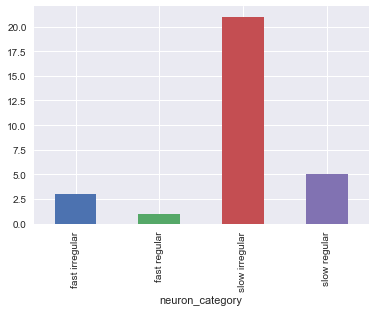

In [27]:
file = return_path(path_to_data, recordings_to_analyse[1])
df = pd.read_csv(file)
total_neurons = df['cluster'].count()
by_neuron_cat = df.groupby('neuron_category')['rate'].count()
by_neuron_cat.plot(kind='bar')